# Lab | Customer Analysis Round 2 (Edited) and Round 3 (Below)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load csv file
df1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

## EXERCISES:

### 1. Show the dataframe shape.

In [3]:
# number of rows and columns
df1.shape

(10910, 26)

### 2. Standardize header names.

In [4]:
df1.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
def standard_cols(dataframe):
    '''Standardize column names into lowercase and replace spaces with underscore.'''
    dataframe.columns = [col.lower().replace(' ','_') for col in df1.columns]
standard_cols(df1)
df1.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [6]:
df1 = df1.drop('unnamed:_0', axis=1) #dropping column which is has the same values as the index

### 3/4. Numerical and Categorical Columns

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

#### Numerical Variables

1. customer_lifetime_value
2. months_since_last_claim
3. income
4. monthly_premium_auto
5. months_since_policy_inception
6. number_of_open_complaints
7. number_of_policies
8. total_claim_amount

#### Categorical Variables

1. customer
2. state
3. response                      
4. coverage                      
5. education                      
6. effective_to_date            
7. employmentstatus            
8. gender                     
9. location_code                
10. marital_status                
11. policy_type                  
12. policy                       
13. renew_offer_type             
14. sales_channel               
15. vehicle_class               
16. vehicle_size              
17. vehicle_type (dropped)         

### Data Cleaning and Observation

In [8]:
# Dealing with duplicates
df1.duplicated().value_counts()
df2 = df1.drop_duplicates()

In [9]:
df2.vehicle_type.value_counts(dropna=False)

NaN    5465
A      5408
Name: vehicle_type, dtype: int64

In [10]:
#deciding to drop the vehicle_type column since there is only 1 unique value available and more than 50% is NaN
#variable is also very vague and not helpful
df2 = df2.drop('vehicle_type', axis=1)

In [11]:
df2.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


In [12]:
#Rounding off to 2 decimal places
df2.customer_lifetime_value = round(df2.customer_lifetime_value,2)
df2.total_claim_amount = round(df2.total_claim_amount,2)

In [13]:
df2['gender'].unique()

array(['M', 'F'], dtype=object)

In [14]:
df2['vehicle_class'].unique()

array(['Four-Door Car', 'SUV', 'Two-Door Car', 'Sports Car', 'Luxury Car',
       'Luxury SUV', nan], dtype=object)

In [15]:
df2['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large', nan], dtype=object)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10873 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10873 non-null  object 
 1   state                          10259 non-null  object 
 2   customer_lifetime_value        10873 non-null  float64
 3   response                       10259 non-null  object 
 4   coverage                       10873 non-null  object 
 5   education                      10873 non-null  object 
 6   effective_to_date              10873 non-null  object 
 7   employmentstatus               10873 non-null  object 
 8   gender                         10873 non-null  object 
 9   income                         10873 non-null  int64  
 10  location_code                  10873 non-null  object 
 11  marital_status                 10873 non-null  object 
 12  monthly_premium_auto           10873 non-null 

### 5. Check and deal with NaN values.

In [17]:
df3 = df2 #copy dataframe for as safety precaution before starting to deal with null values

In [18]:
def check_na(dataframe):
    '''This function uses the dataframe as a parameter to check whether it has any null values.'''
    return dataframe.isna().sum()
check_na(df3)

customer                           0
state                            614
customer_lifetime_value            0
response                         614
coverage                           0
education                          0
effective_to_date                  0
employmentstatus                   0
gender                             0
income                             0
location_code                      0
marital_status                     0
monthly_premium_auto               0
months_since_last_claim          623
months_since_policy_inception      0
number_of_open_complaints        623
number_of_policies                 0
policy_type                        0
policy                             0
renew_offer_type                   0
sales_channel                      0
total_claim_amount                 0
vehicle_class                    608
vehicle_size                     608
dtype: int64

<AxesSubplot:>

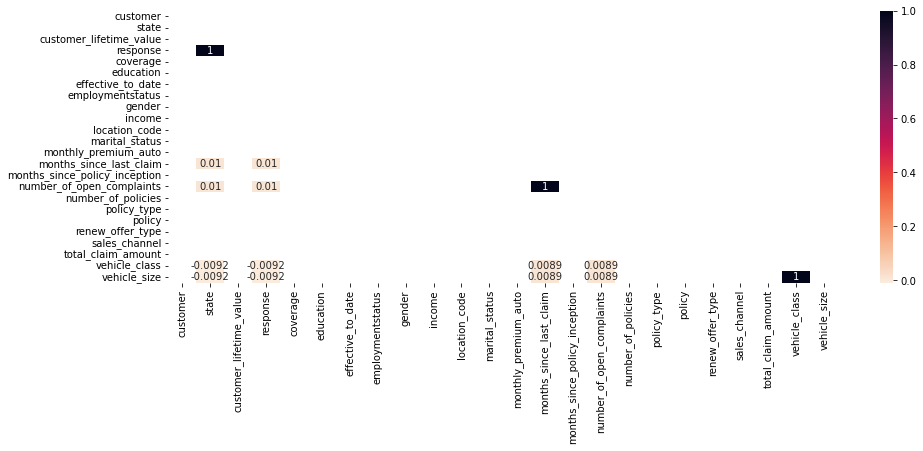

In [19]:
plt.figure(figsize=(15,5))
corr_na = df3.isna().corr()
mask = np.zeros_like(corr_na)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_na,annot=True, cmap='rocket_r',mask=mask)

Missing Values Correlation = 1
- state & response
- months_since_last_claim & number_of_open_complaints
- vehicle_class & vehicle_size

In [20]:
# look at records with missing values
df_na= df3[df3.isna().any(axis=1)]
df_na

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
4,QA50777,Oregon,9025.07,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.93,Four-Door Car,Medsize
5,HO81102,NaN,4745.18,NaN,Basic,High School or Below,2/14/11,Employed,M,50549,...,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.80,Four-Door Car,Medsize
11,GE63585,NaN,2420.71,NaN,Basic,Bachelor,2/7/11,Employed,M,31710,...,29,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.55,Two-Door Car,Medsize
23,NQ71171,California,5107.07,No,Basic,Bachelor,2/2/11,Employed,M,70174,...,80,NaN,7,Personal Auto,Personal L2,Offer1,Agent,128.90,Four-Door Car,Medsize
51,FT56968,Arizona,2590.10,No,Basic,High School or Below,1/3/11,Employed,M,22398,...,76,NaN,1,Personal Auto,Personal L1,Offer1,Agent,321.60,Four-Door Car,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10883,FD64348,Oregon,22563.62,No,Basic,High School or Below,1/17/11,Employed,M,23046,...,7,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.69,NaN,NaN
10890,VQ78876,Oregon,4660.40,No,Basic,Bachelor,2/3/11,Employed,F,89834,...,11,0.0,1,Corporate Auto,Corporate L3,Offer1,Branch,43.16,NaN,NaN
10894,EX63393,NaN,6314.49,NaN,Extended,Master,2/27/11,Employed,F,66947,...,12,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.40,Four-Door Car,Small
10905,FE99816,Nevada,15563.37,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.40,Luxury Car,Medsize


In [21]:
df_na[['gender', 'state']].value_counts(dropna=False)

gender  state     
F       NaN           332
M       NaN           282
        California    223
F       California    175
        Oregon        160
M       Oregon        136
F       Arizona       125
M       Arizona       106
        Nevada         58
F       Nevada         52
        Washington     52
M       Washington     38
dtype: int64

In [22]:
df_na.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,1739.000000,1739.000000,1739.000000,1116.000000,1739.000000,1116.000000,1739.000000,1739.000000
mean,8079.602450,36905.345026,93.202990,15.538530,48.278321,0.376344,3.036803,439.178936
std,6958.839611,30269.139228,34.709706,10.120855,28.062720,0.918146,2.436967,301.223300
min,1918.120000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.380000
25%,4098.650000,0.000000,68.000000,7.000000,25.000000,0.000000,1.000000,265.205000
50%,5704.980000,32918.000000,82.000000,15.000000,50.000000,0.000000,2.000000,379.200000
75%,9042.325000,61817.000000,109.000000,24.000000,72.000000,0.000000,4.000000,542.400000
max,58207.130000,99845.000000,295.000000,35.000000,99.000000,5.000000,9.000000,2552.340000


In [23]:
len(df_na)/len(df3) #percent of missing values in the dataframe

0.15993745976271498

In [24]:
# Remove observations with null values which represents 16% of all observation and look to be random
# We will still have more than 9134 records after deleting missing values
def drop_na(df):
    '''This function drops all missing values in the dataframe.'''
    df = df.dropna()
    return df
df4 = drop_na(df3)

In [25]:
df4.info()
check_na(df4).sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   

0

In [26]:
df4.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,DK49336,Arizona,4809.22,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize
1,KX64629,California,2228.53,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize
3,XL78013,Oregon,22332.44,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize
6,IW72280,California,5035.04,No,Basic,Doctor,2/14/11,Employed,F,37405,...,99,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.56,Four-Door Car,Medsize


### 6.1. Datetime format

In [27]:
def transform_to_date(column):
    column = pd.to_datetime(column, errors='coerce')
    return column
df4.effective_to_date = transform_to_date(df4.effective_to_date)

/Users/RachelleFlores/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
df4.sample(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
8701,DX31066,Washington,2667.27,No,Basic,College,2011-02-10,Employed,F,94041,...,11,0.0,1,Personal Auto,Personal L3,Offer3,Agent,159.76,Four-Door Car,Medsize
6838,XA55993,Oregon,3133.50,No,Extended,Master,2011-02-07,Employed,F,58850,...,26,0.0,1,Personal Auto,Personal L3,Offer2,Branch,143.75,Four-Door Car,Medsize
4828,OD89873,Arizona,8044.87,Yes,Basic,Bachelor,2011-02-19,Employed,M,71391,...,39,0.0,2,Corporate Auto,Corporate L1,Offer2,Agent,284.00,Four-Door Car,Medsize
3329,DX65548,Arizona,4834.71,Yes,Basic,College,2011-01-31,Employed,F,38713,...,69,4.0,6,Personal Auto,Personal L1,Offer2,Call Center,316.80,Four-Door Car,Medsize
3692,WL67313,California,10014.06,No,Extended,College,2011-02-05,Unemployed,F,0,...,17,1.0,2,Personal Auto,Personal L3,Offer1,Branch,705.60,Two-Door Car,Small
1765,MR22119,Oregon,4430.57,No,Basic,High School or Below,2011-01-07,Employed,M,24059,...,17,0.0,1,Personal Auto,Personal L3,Offer4,Web,537.60,SUV,Medsize
3792,WL85494,California,41075.43,No,Extended,College,2011-02-17,Employed,M,21988,...,62,0.0,2,Personal Auto,Personal L3,Offer2,Branch,1003.20,Luxury Car,Medsize
4795,QP80741,Washington,6048.57,No,Basic,College,2011-01-01,Unemployed,F,0,...,71,3.0,2,Corporate Auto,Corporate L1,Offer3,Agent,292.80,Four-Door Car,Medsize
640,MD73554,California,5251.98,No,Basic,College,2011-02-22,Employed,M,59537,...,5,0.0,7,Personal Auto,Personal L1,Offer1,Branch,316.80,Two-Door Car,Medsize
5988,SJ71233,California,7423.93,No,Basic,College,2011-02-22,Unemployed,F,0,...,27,0.0,9,Personal Auto,Personal L2,Offer1,Branch,513.60,SUV,Medsize


### 6.2. Extract the months from the dataset and store in a separate column.

In [29]:
def extract_month(fromcol):
    '''Extracts month from datetime column. Don't forget to assign function result to a variable with new column name'''
    newcol = fromcol.dt.month
    return newcol
df4['month'] = extract_month(df4.effective_to_date)

/var/folders/dg/rfjw5drd4hd12g7gk7g9v89m0000gn/T/ipykernel_6498/551279118.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['month'] = extract_month(df4.effective_to_date)


In [30]:
df4.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.22,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,2
1,KX64629,California,2228.53,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,2
3,XL78013,Oregon,22332.44,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,1
6,IW72280,California,5035.04,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.56,Four-Door Car,Medsize,2


### 6.3. Filter the data to show only the information for the first quarter.

In [31]:
def q1(df):
    '''Filter the dataframe to only the first quarter records(January, February, March)'''
    return df[df['month'].isin({1,2,3})]
df_clean_q1 = q1(df4)
df_clean_q1

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.22,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,2
1,KX64629,California,2228.53,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,2
3,XL78013,Oregon,22332.44,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,1
6,IW72280,California,5035.04,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.56,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.66,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.20,Two-Door Car,Medsize,1
10904,QI63521,Nevada,19228.46,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.60,Luxury SUV,Medsize,2
10906,KX53892,Oregon,5259.44,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.02,Four-Door Car,Medsize,1
10907,TL39050,Arizona,23893.30,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.31,Luxury SUV,Medsize,2


# Lab Round 3

### 1. Show DataFrame info.

In [32]:
# copy last df
df_q1 = df_clean_q1
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status  

In [33]:
df_q1.reset_index(drop=True, inplace=True)
df_q1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.22,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.80,Four-Door Car,Medsize,2
1,KX64629,California,2228.53,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.92,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.92,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.00,SUV,Medsize,2
3,XL78013,Oregon,22332.44,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.01,Four-Door Car,Medsize,1
4,IW72280,California,5035.04,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.56,Four-Door Car,Medsize,2


### 2. Describe DataFrame.

In [34]:
df_q1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940473,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088834,1.463762
std,6870.967599,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500043,0.498712
min,1898.010000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.100000,1.000000
25%,3994.250000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.260000,1.000000
50%,5780.180000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945000,1.000000
75%,8962.170000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.515000,2.000000
max,83325.380000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.240000,2.000000


### 3. Show a plot of the total number of responses.

<AxesSubplot:xlabel='response', ylabel='Count'>

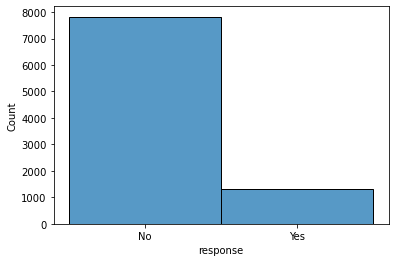

In [35]:
response = df_q1['response']
sns.histplot(response)

In [36]:
response.value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

### 4. Show a plot of the response rate by the sales channel.

Text(0.5, 1.0, 'Percent of Response per Sales Channel')

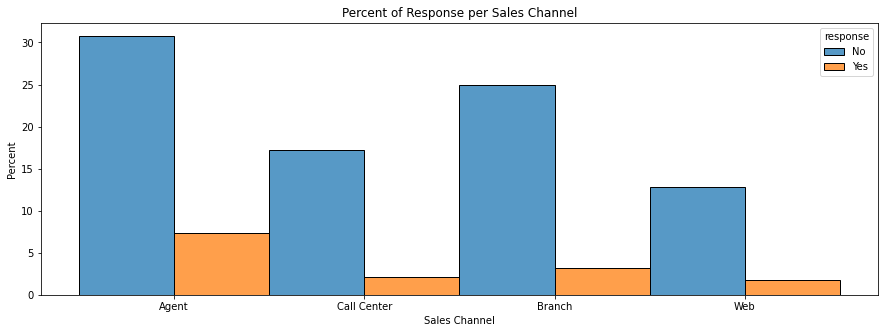

In [37]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_q1, x='sales_channel', hue=response, stat='percent', multiple='dodge')
plt.xlabel('Sales Channel')
plt.title('Percent of Response per Sales Channel')

### 5. Show a plot of the response rate by the total claim amount.

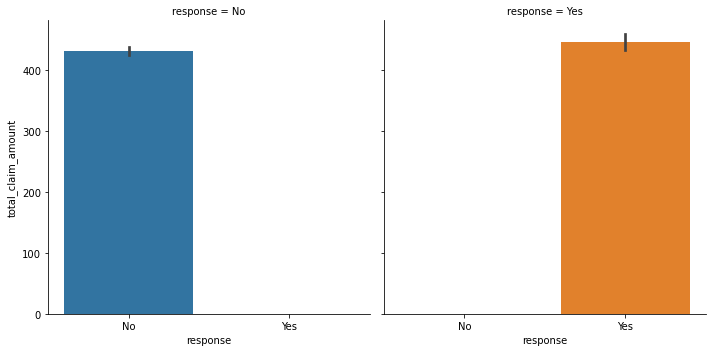

In [38]:
sns.catplot(data=df_q1, x='response', y="total_claim_amount", col='response', kind='bar')

In [39]:
df_q1.groupby('response')['total_claim_amount'].value_counts()

response  total_claim_amount
No        292.80                92
          312.00                84
          321.60                82
          355.20                80
          331.20                78
                                ..
Yes       1261.32                6
          1294.70                6
          1300.80                6
          1324.80                6
          1358.40                6
Name: total_claim_amount, Length: 5011, dtype: int64

In [48]:
# new dfs separating responses to yes and no
no= df_q1[df_q1['response']=='No']
yes= df_q1[df_q1['response']=='Yes']

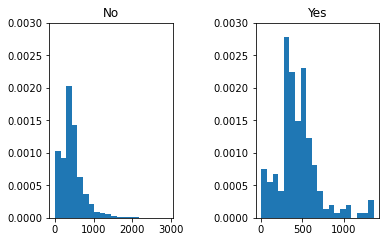

<Figure size 720x360 with 0 Axes>

In [99]:
fig, axs = plt.subplots(1,2)
plt.figure(figsize=(10,5))
axs[0].hist(no['total_claim_amount'],density=True, bins=20)
axs[0].set_ylim(0, 0.003)
axs[0].title.set_text('No')
axs[1].hist(yes['total_claim_amount'], density=True, bins=20)
axs[1].set_ylim(0, 0.003)
axs[1].title.set_text('Yes')

fig.tight_layout(pad=3.0)

plt.show()

### 6. Show a plot of the response rate by income.

<AxesSubplot:xlabel='income', ylabel='response'>

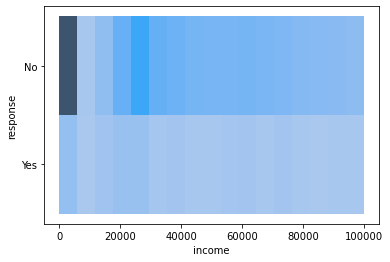

In [102]:
sns.histplot(data=df_q1, x='income', y='response',stat='percent')

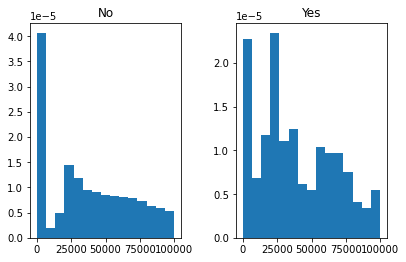

<Figure size 1440x720 with 0 Axes>

In [123]:
fig, axs = plt.subplots(1,2)
plt.figure(figsize=(20,10))
axs[0].hist(no['income'], bins=15, density=True)
axs[0].title.set_text('No')
axs[1].hist(yes['income'], bins=15, density=True)
axs[1].title.set_text('Yes')

fig.tight_layout(pad=2.0)
plt.show()